<a href="https://colab.research.google.com/github/Shkum/IT_STEP/blob/ML/HomeWork_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [26]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


pclass -- клас білета(перший, другий або третій)

sex -- стать

age -- вік

sibsp -- кількість братів\сестер та чоловіків\дружин на борту

parch -- кількість дітей та батьків на борту

fare -- вартість поїздки

embarked -- Порт посадки (C = Шербур, Q = Квінстаун, S = Саутгемптон)

# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак
* аналіз категоріальних ознак
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


__________________________
# age has NULL values

# embarked has NULL values
____________________________

In [28]:
mask = df['age'].isna()
df = df[~mask]

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    714 non-null    int64  
 1   sex       714 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     714 non-null    int64  
 4   parch     714 non-null    int64  
 5   fare      714 non-null    float64
 6   embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.6+ KB


In [30]:
df.describe()

,pclass,age,sibsp,parch,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,20.125000,0.000000,0.000000,8.050000
50%,2.000000,28.000000,0.000000,0.000000,15.741700
75%,3.000000,38.000000,1.000000,1.000000,33.375000
max,3.000000,80.000000,5.000000,6.000000,512.329200


In [31]:
df.shape

(714, 7)

<Axes: >

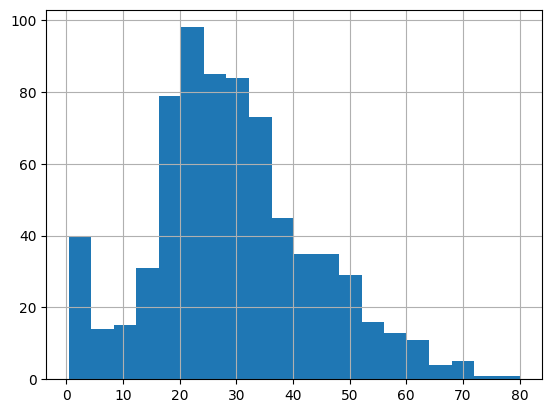

In [32]:
df['age'].hist(bins=20)

In [33]:
df['pclass'].value_counts()

3    355
1    186
2    173
Name: pclass, dtype: int64

<Axes: ylabel='sex'>

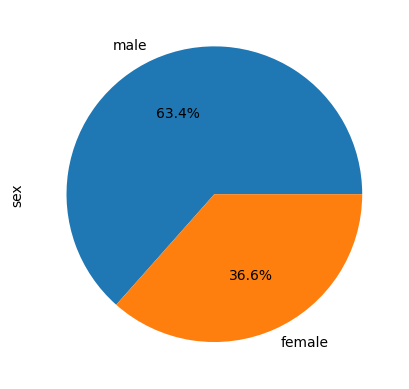

In [34]:
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [35]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [36]:
cat_columns = df.select_dtypes(include='object')
cat_columns.head(3)

,sex,embarked
0,male,S
1,female,C
2,female,S


In [37]:
num_columns = df.select_dtypes(exclude='object')
num_columns.head(3)

,pclass,age,sibsp,parch,fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250


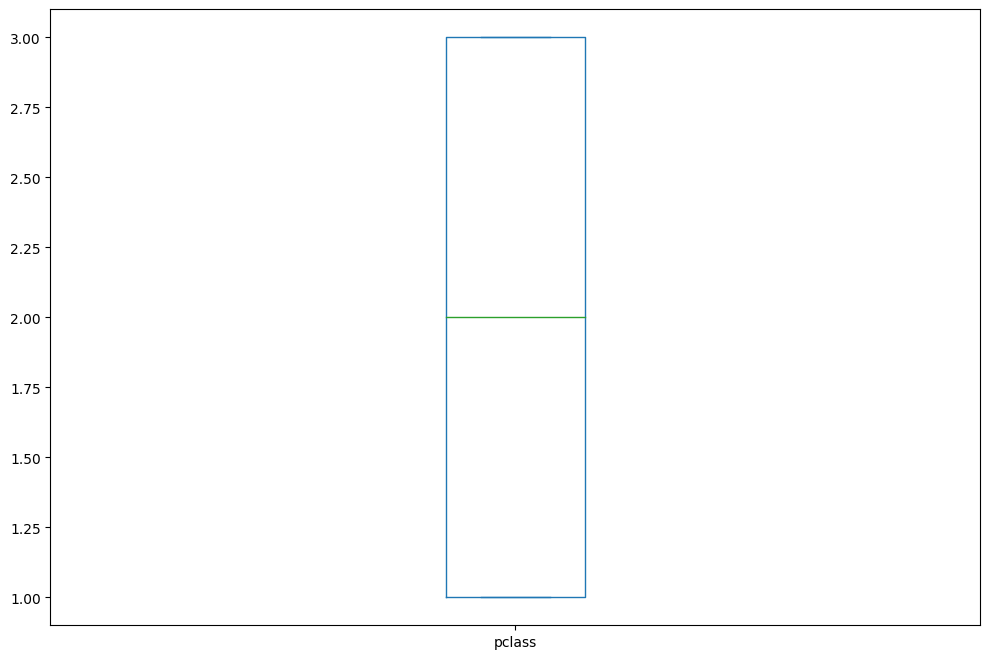

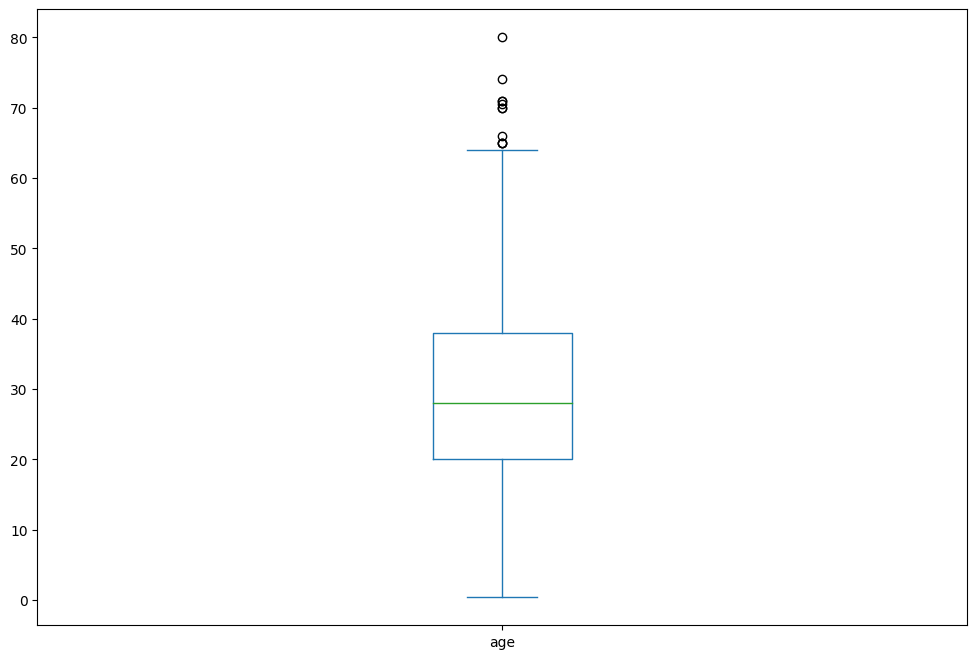

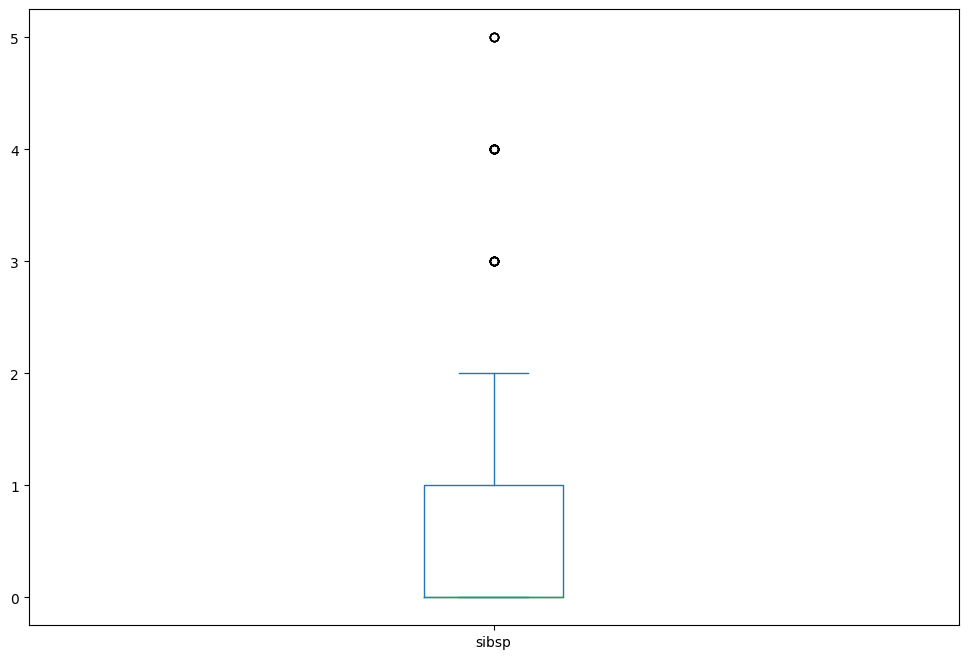

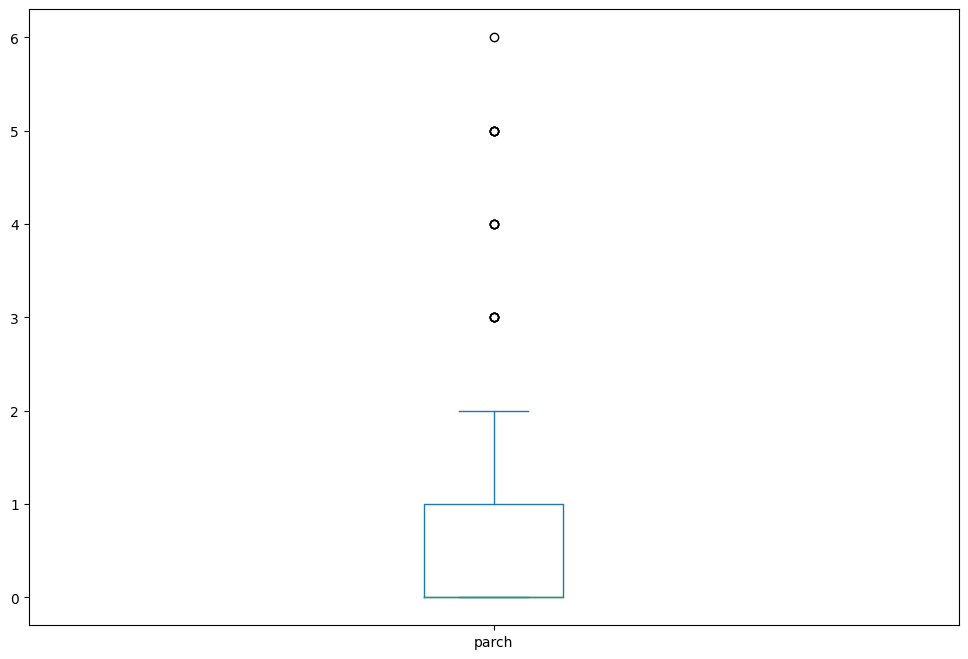

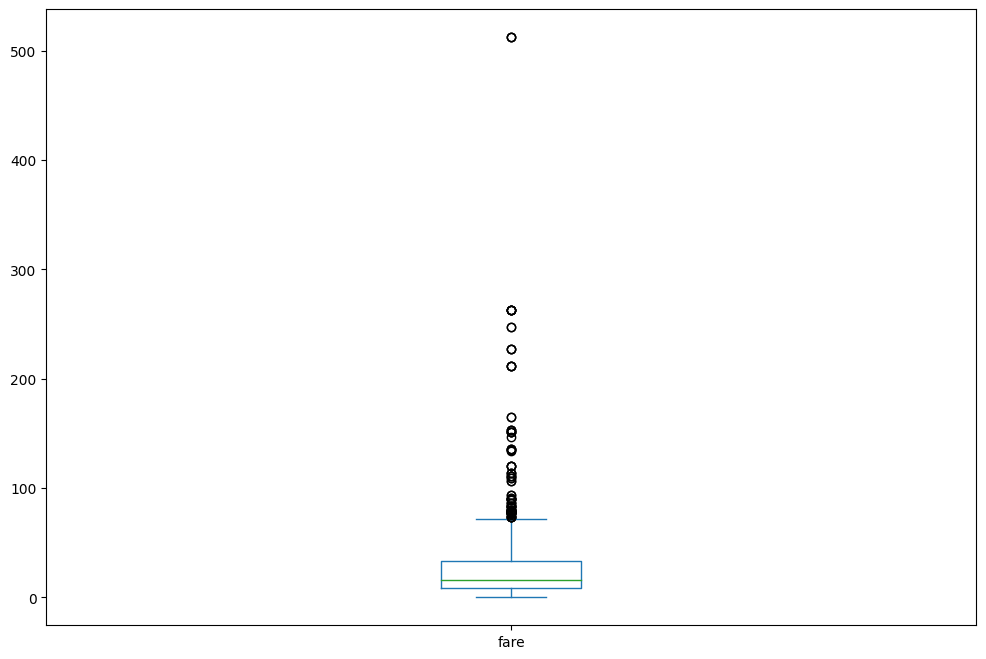

In [38]:

for column in num_columns.columns:
    num_columns[[column]].plot(kind='box', figsize=(12, 8))

In [39]:
q1 = num_columns.quantile(q=0.25)
q3 = num_columns.quantile(q=0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
mask = ((num_columns >= lower) & (num_columns <= upper))
mask = mask.all(axis=1)
num_columns = num_columns[mask]
num_columns.head()

,pclass,age,sibsp,parch,fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


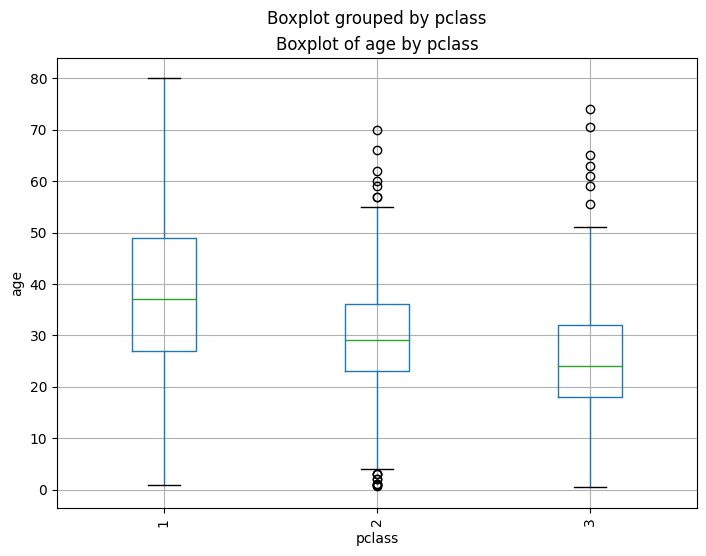

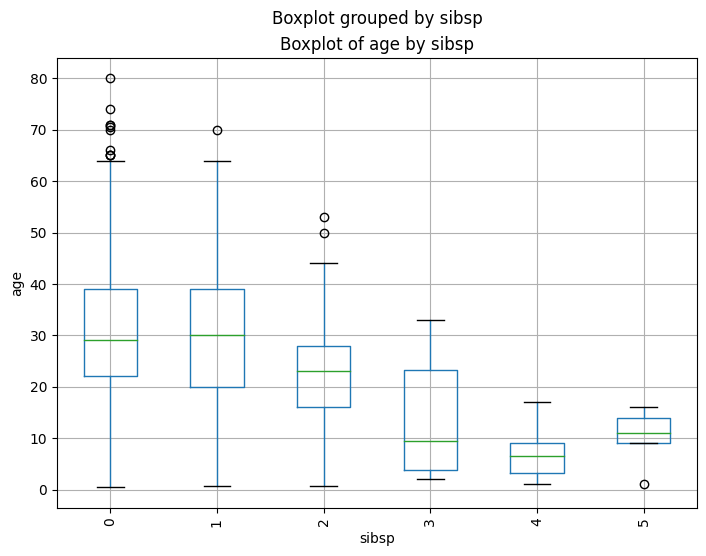

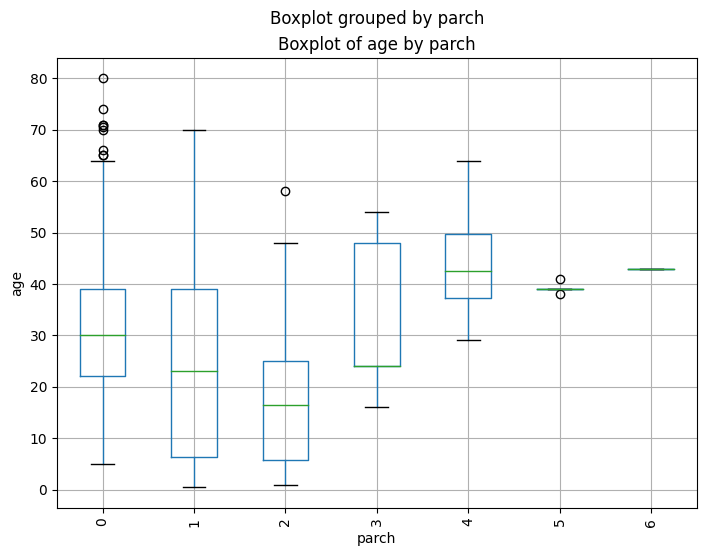

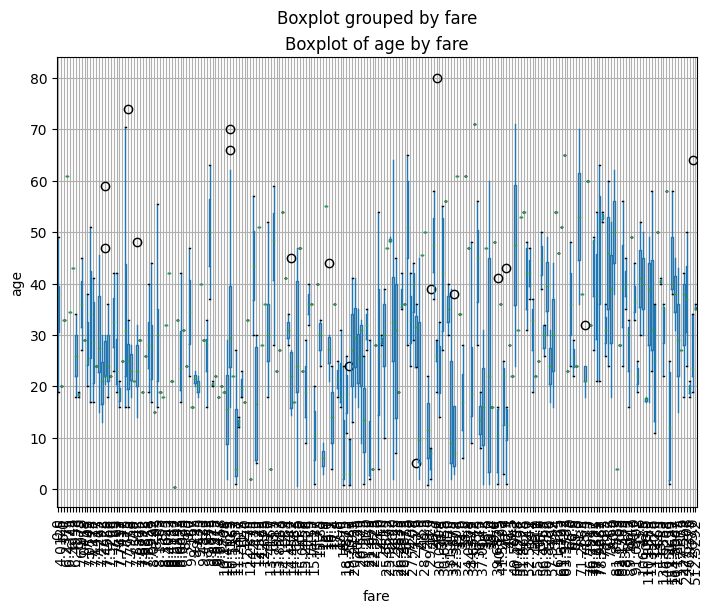

In [40]:
for column in num_columns:
    if column not in ('age'):
        df.boxplot(column='age', by=column, figsize=(8, 6))
        plt.title(f'Boxplot of age by {column}')
        plt.xlabel(column)
        plt.ylabel('age')
        plt.xticks(rotation=90)
        plt.show()

# - ЧЕМ СТАРШЕ КЛИЕНТЫ ТЕМ ВЫШЕ КЛАСС (БОЛЬШЕ ГОТОВЫ ПЛАТИТЬ ЗА КОМФОРТ)
# - ЧЕМ СТАРШЕ КЛИЕНТЫ ТЕМ МЕНЬШЕ БРАТЬЕВ И СЕСТЕР НА БОРТУ, НО БОЛЬШЕ ДЕТЕЙ И РОДИТЕЛЕЙ
# - ЗАВИСИМОСТИ ОБЩИХ ЗАТРАТ ОТ ВОЗРАСТА НЕ НАБЛЮДАЕТСЯ

In [41]:
num_columns.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

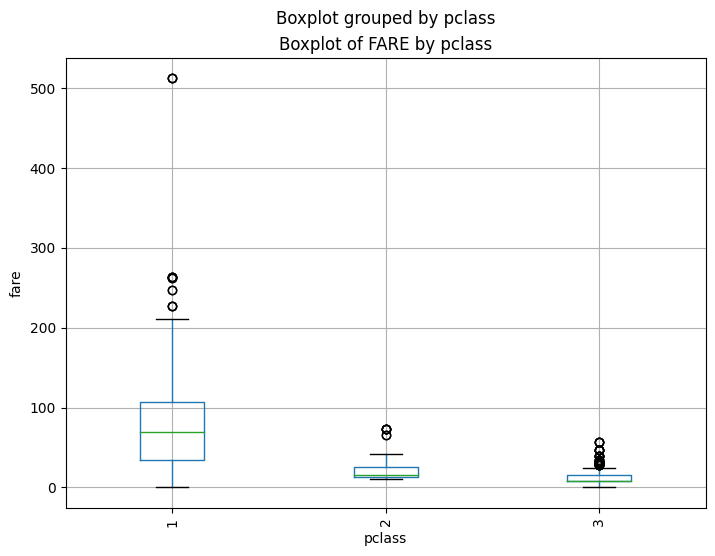

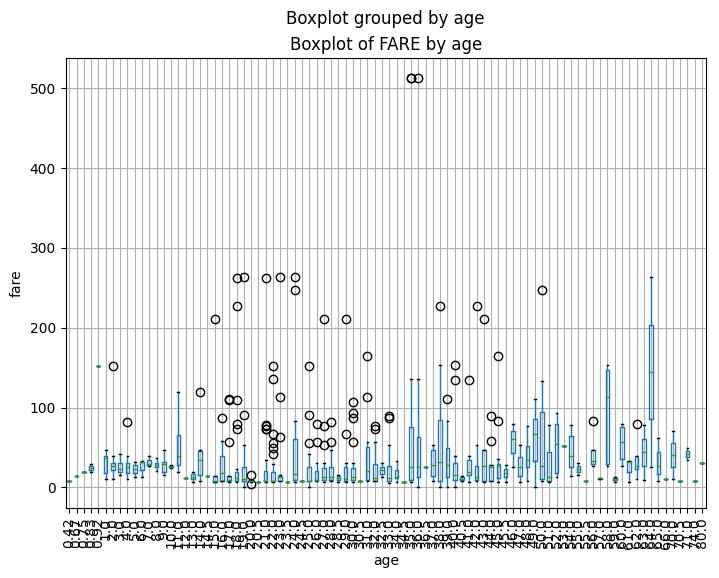

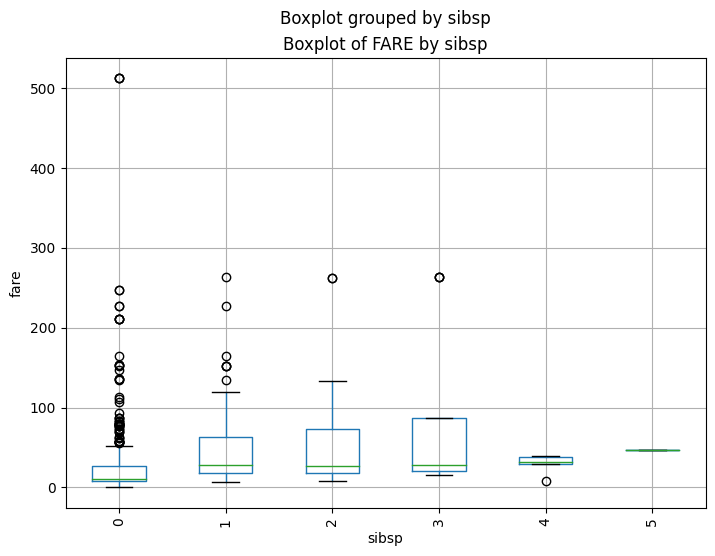

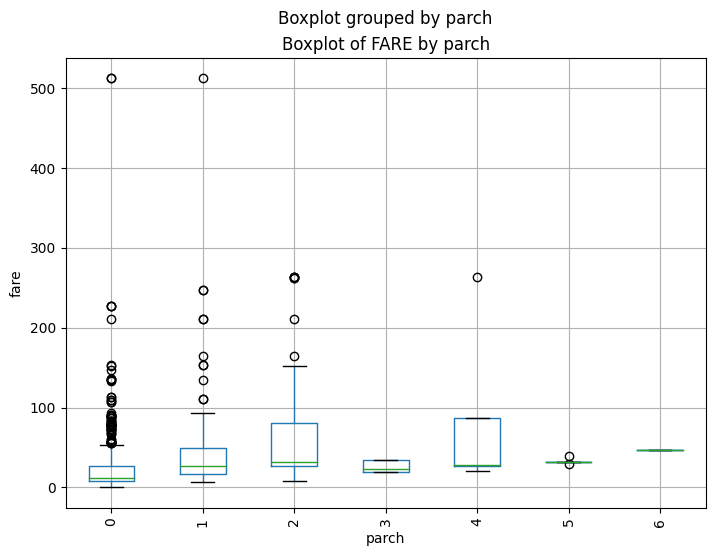

In [42]:
for column in num_columns:
    if column not in ('fare'):
        df.boxplot(column='fare', by=column, figsize=(8, 6))
        plt.title(f'Boxplot of FARE by {column}')
        plt.xlabel(column)
        plt.ylabel('fare')
        plt.xticks(rotation=90)
        plt.show()

# - ПАССАЖИРЫ ПЕРВОГО КЛАССА ТРАТИЛИ БОЛЬШЕ ВСЕГО
# - ОДИНОКИЕ ПАССАЖИРЫ ТРАТИЛИ МЕНЬШЕ ВСЕГО


<ipython-input-43-758d8a674b46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


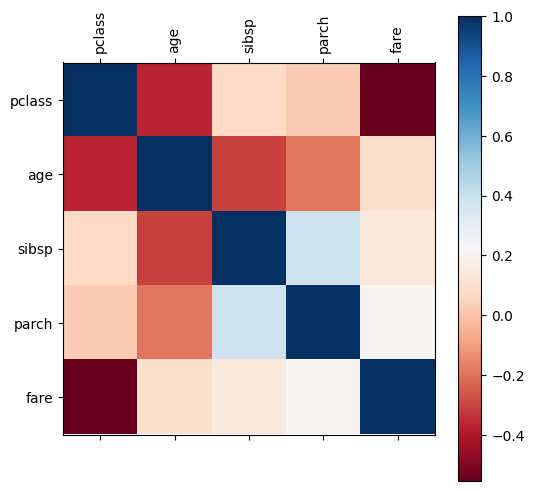

In [43]:
corr = df.corr(method='pearson')
fig = plt.figure(figsize=(6,6))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

# ВЫРАЖЕННОЙ КОРЕЛЛЯЦИИ ДАННЫХ НЕ НАБЛЮДАЕТСЯ

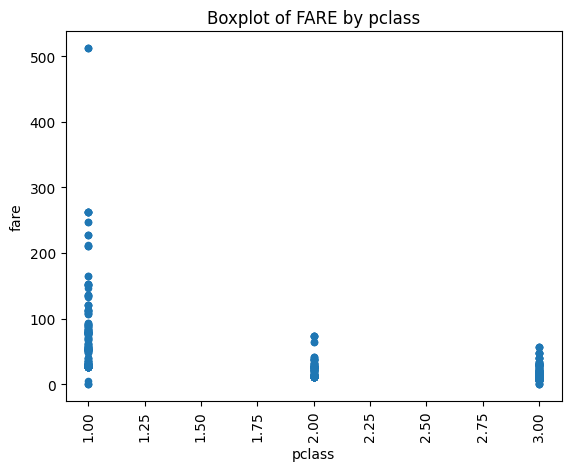

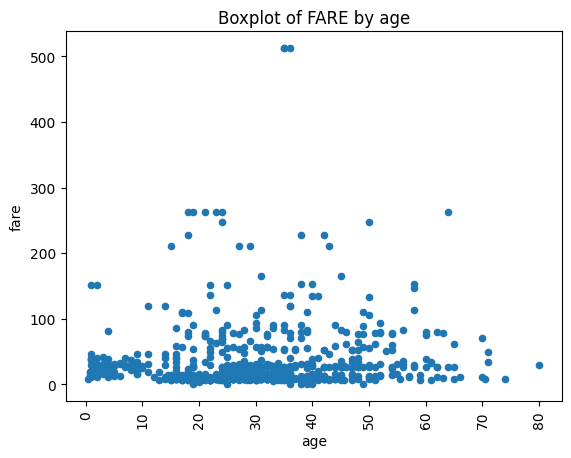

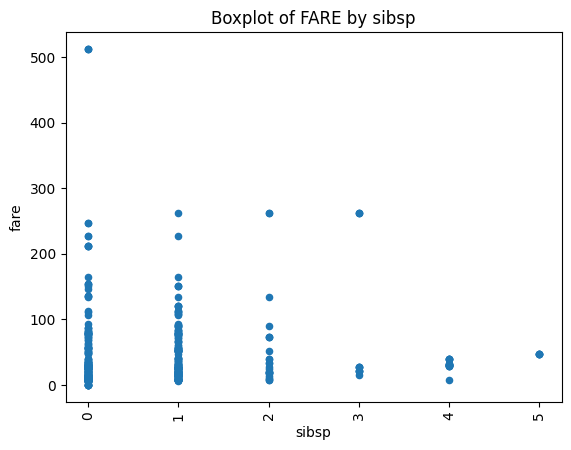

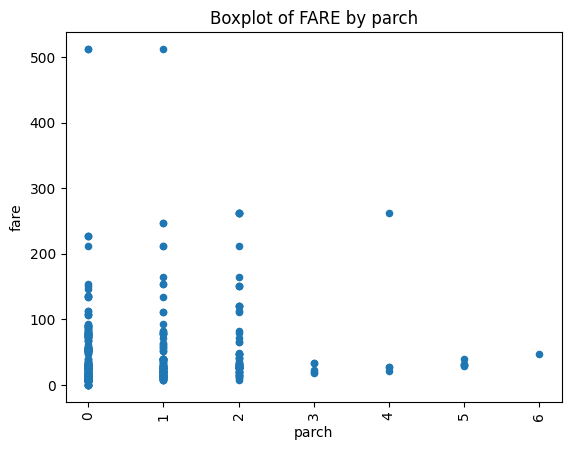

In [44]:
for column in num_columns:
    if column not in ('fare'):
        df.plot(kind='scatter', x=column, y='fare')
        plt.title(f'Boxplot of FARE by {column}')
        plt.xlabel(column)
        plt.ylabel('fare')
        plt.xticks(rotation=90)
        plt.show()



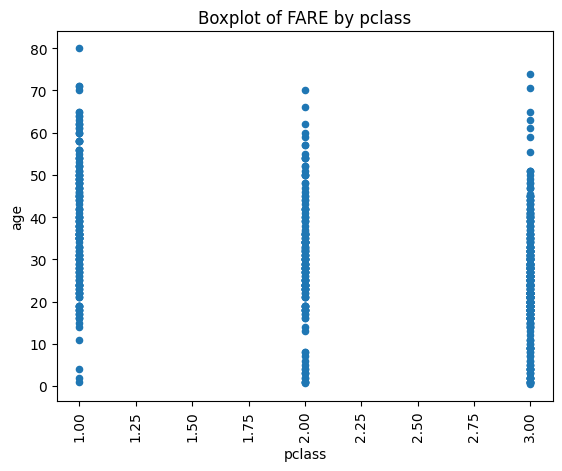

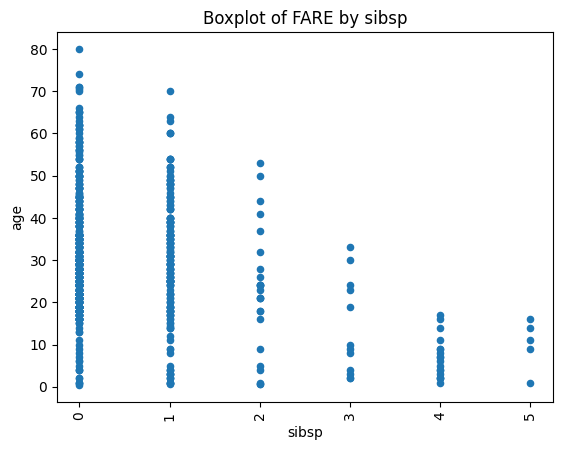

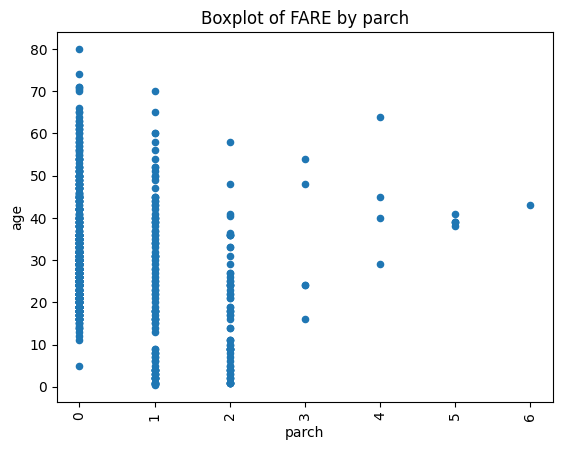

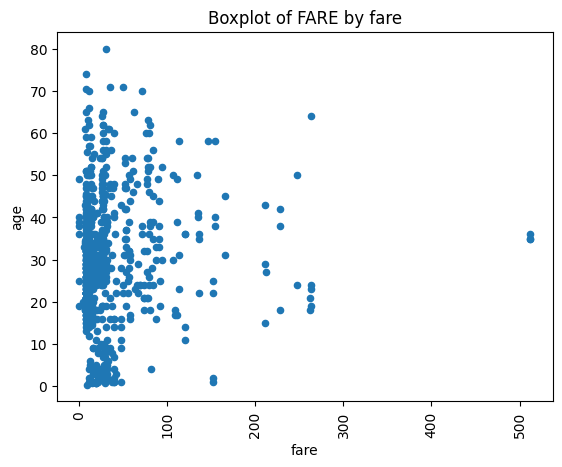

In [45]:
for column in num_columns:
    if column not in ('age'):
        df.plot(kind='scatter', x=column, y='age')
        plt.title(f'Boxplot of FARE by {column}')
        plt.xlabel(column)
        plt.ylabel('age')
        plt.xticks(rotation=90)
        plt.show()

# ТУТ НЕ СОВСЕМ ПОНЯЛ, СУДЯ ПО БОКС ПЛОТУ БОЛЬШЕ ТРАТИЛИ ПОЖИЛЫЕ ЛЮДИ, НО ПО ПОСЛЕДНЕМУ ГРАФИГУ ПОЛУЧАЕТСЯ МАКСИМАЛЬНЫЕ РАСХОДЫ У 20-25 ЛЕТНИХ И ПРИМЕРНО 40 ЛЕТНИХ. НАВЕРНО ЕЩЕ НЕ НАУЧИЛСЯ ПРАВИЛЬНО БОКС ПЛОТЫ ПОНИМАТЬ, ИЛИ В ТОЧЕЧНОМ ГРАФИКЕ ВЫБРОСЫ СБИВАЮТ С ТОЛКУ

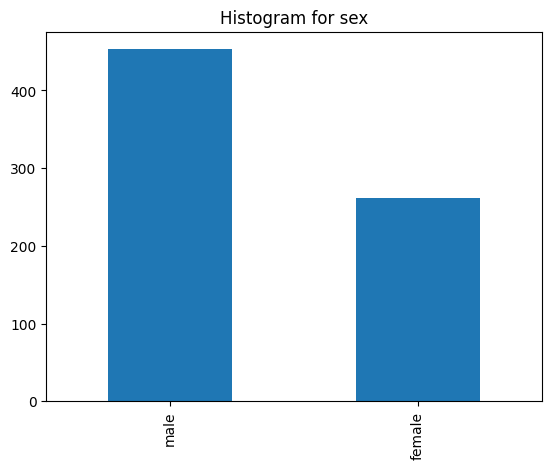

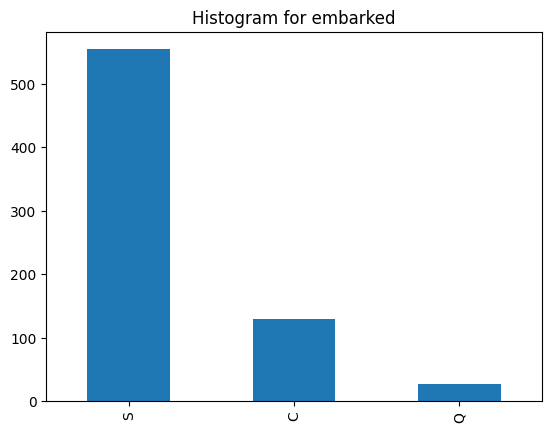

In [46]:
for column in cat_columns:
    cat_columns[column].value_counts().plot(kind='bar')
    plt.title(f'Histogram for {column}')
    plt.show()

#

# СУДЯ ПО ГРАФИКАМ, ЖЕНСКОГО ПОЛА НА БОРТУ БОЛЬШЕ ПРОЦЕНТОВ НА 40
# ОСНОВНАЯ МАССА ПАССАЖИРОВ СЕЛА НА БОРТ В САУСХЕМПТОНЕ

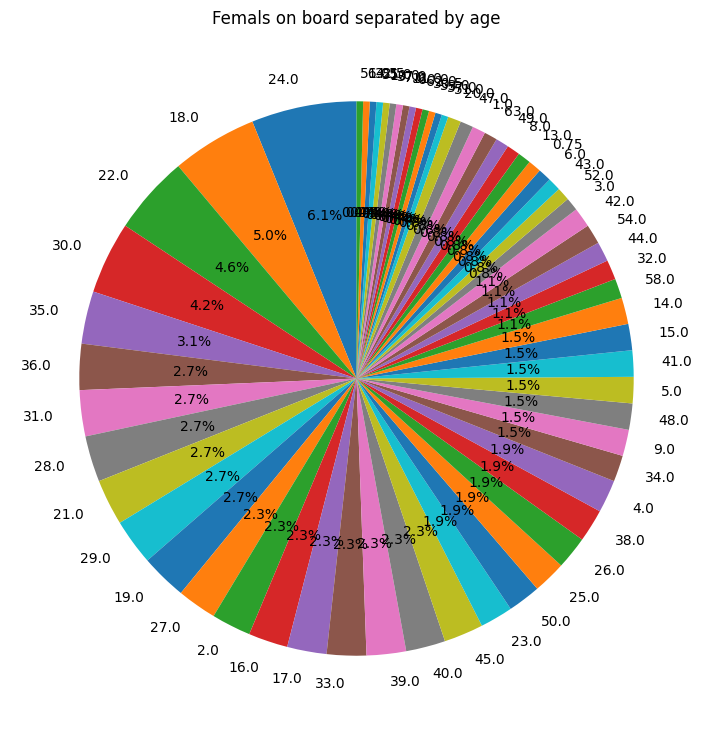

In [75]:
female_data = df[df['sex'] == 'female']
plt.figure(figsize=(9, 9))
female_data['age'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Femals on board separated by age')
plt.ylabel(None)
plt.show()

Text(0, 0.5, 'age')

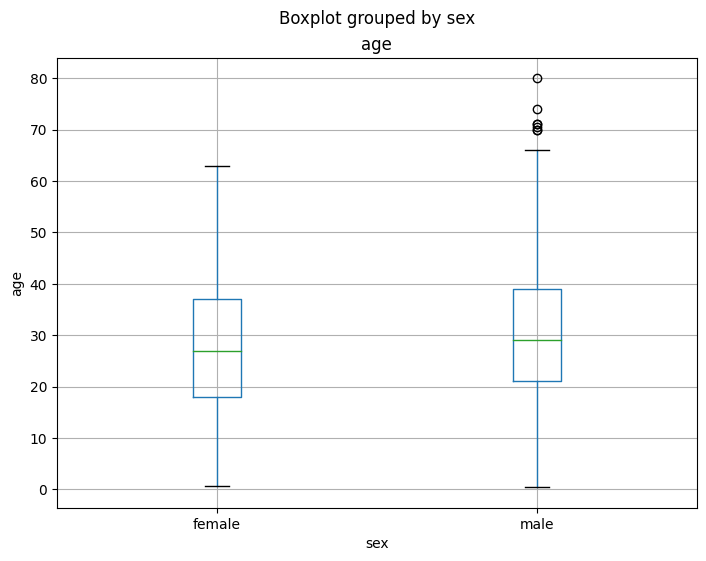

In [72]:
df.boxplot(column='age', by='sex', figsize=(8, 6))
plt.xlabel('sex')
plt.ylabel('age')

# В СРЕДНЕМ ВОЗРАСТ МУЖЧИН НА НЕСКОЛЬКО ЛЕТ БОЛЬШЕ ЧЕМ У ЖЕНЩИН